In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
import pickle

# Load and preprocess data
ipl = pd.read_csv("ipl_data.csv")
df = ipl[["bat_team", "bowl_team", "overs", "runs", "wickets", "total"]].copy()
df.columns = ["batting_team", "bowling_team", "overs", "runs", "wickets", "total"]

# Label encode teams
label_encoders = {}
for col in ["batting_team", "bowling_team"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define features and target
X = df.drop("total", axis=1)
y = df["total"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Define and train the MLP model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='linear')
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2, verbose=1)
print(model.predict(X_train_scaled))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1521/1521 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 8312.5742 - val_loss: 486.0406
Epoch 2/100
1521/1521 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 481.0012 - val_loss: 439.3139
Epoch 3/100
1521/1521 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 447.1094 - val_loss: 420.8299
Epoch 4/100
1521/1521 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 426.3992 - val_loss: 417.3020
Epoch 5/100
1521/1521 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 424.6483 - val_loss: 417.1436
Epoch 6/100
1521/1521 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 426.9872 - val_loss: 419.5943
Epoch 7/100
1521/1521 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 424.3682 - val_loss: 416.0486
Epoch 8/100
1521/1521 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 430.3626 - val_loss: 418.1609
Epoch 9/100
1521/1521 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 421.0318 - val_loss: 417.5457
Epoch 10/100
1521/1521 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 430.0263 - val_loss: 414.7709
Epoch 11/100
1521/1521 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 428.

In [ ]:
# Save model and preprocessors
model.save("ipl_mlp_model.h5")
with open("label_encoders.pkl", "wb") as f:
    pickle.dump(label_encoders, f)
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("Model and preprocessors saved!")


Model and preprocessors saved!


476/476 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
MSE: 370.04
MAE: 14.08
R² Score: 0.56


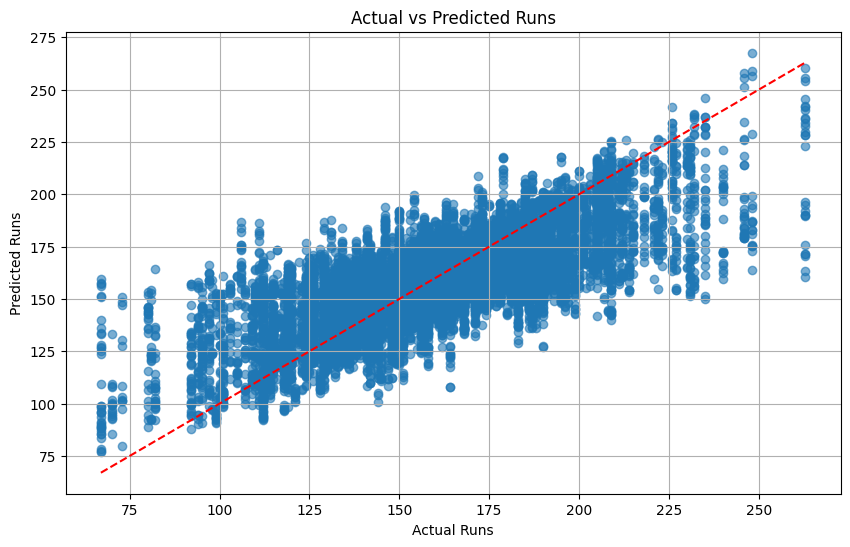

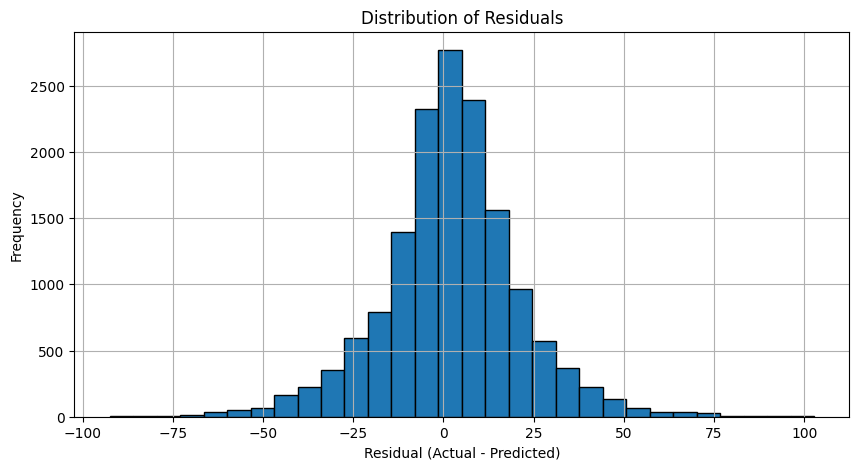

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict on test data
y_pred = model.predict(X_test_scaled).flatten()

# Errors
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.2f}")

# 1. True vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Runs")
plt.ylabel("Predicted Runs")
plt.title("Actual vs Predicted Runs")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.grid(True)
plt.show()

# 2. Residuals plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 5))
plt.hist(residuals, bins=30, edgecolor='black')
plt.title("Distribution of Residuals")
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


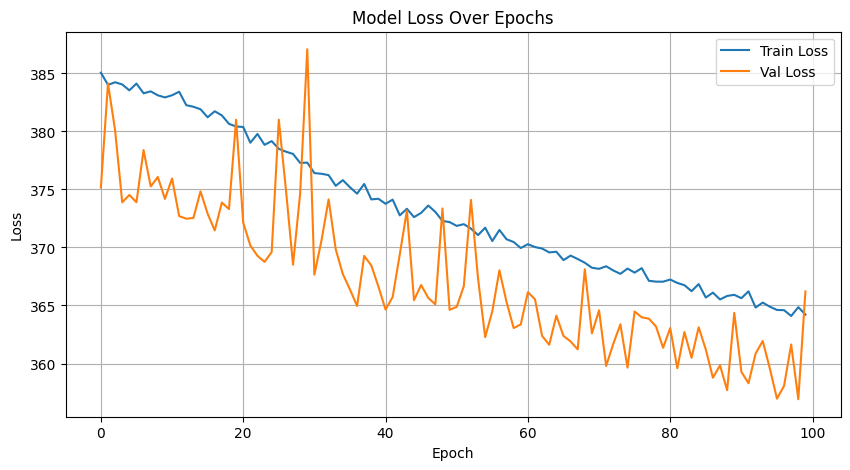

In [ ]:
# 3. Loss curves
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2, verbose=0)
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Model Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()